In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder,StandardScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.model_selection import validation_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import joblib

In [2]:
import warnings
warnings.filterwarnings('ignore')

    HEART ATTACK

In [3]:
hrt_df = pd.read_csv('heart_attack.csv')
hrt_df.head() #Male = 1 & Female = 0 already mentioned by the data Provider
hrt_df.info()
oe = OrdinalEncoder()
hrt_df['Result'] = oe.fit_transform(hrt_df[['Result']])
hrt_df = hrt_df.rename(columns = {'Result': 'Heart Attack'})
hrt_df['BP_ratio'] = hrt_df['Systolic blood pressure'] / hrt_df['Diastolic blood pressure']
hrt_df.drop(columns=['Systolic blood pressure','Diastolic blood pressure'],inplace = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   int64  
 1   Gender                    1319 non-null   int64  
 2   Heart rate                1319 non-null   int64  
 3   Systolic blood pressure   1319 non-null   int64  
 4   Diastolic blood pressure  1319 non-null   int64  
 5   Blood sugar               1319 non-null   float64
 6   CK-MB                     1319 non-null   float64
 7   Troponin                  1319 non-null   float64
 8   Result                    1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [4]:
hrt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           1319 non-null   int64  
 1   Gender        1319 non-null   int64  
 2   Heart rate    1319 non-null   int64  
 3   Blood sugar   1319 non-null   float64
 4   CK-MB         1319 non-null   float64
 5   Troponin      1319 non-null   float64
 6   Heart Attack  1319 non-null   float64
 7   BP_ratio      1319 non-null   float64
dtypes: float64(5), int64(3)
memory usage: 82.6 KB


In [5]:
hrt_df.head()

,Age,Gender,Heart rate,Blood sugar,CK-MB,Troponin,Heart Attack,BP_ratio
0,63,1,66,160.0,1.80,0.012,0.0,1.927711
1,20,1,94,296.0,6.75,1.060,1.0,2.130435
2,56,1,64,270.0,1.99,0.003,0.0,2.077922
3,66,1,70,270.0,13.87,0.122,1.0,2.181818
4,54,1,64,300.0,1.08,0.003,0.0,1.723077


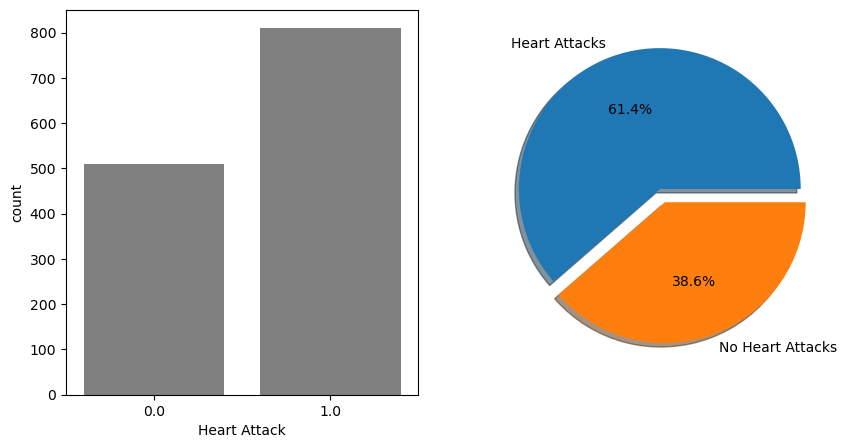

In [6]:
label = ['Heart Attacks' ,'No Heart Attacks']
fig,ax = plt.subplots(1,2, figsize = (10,5))
sns.countplot(x = 'Heart Attack',data = hrt_df,ax = ax[0],color = 'grey')
plt.pie(hrt_df['Heart Attack'].value_counts(),autopct='%0.1f%%',shadow=True,explode = [0.1,0],labels = label)
plt.show()

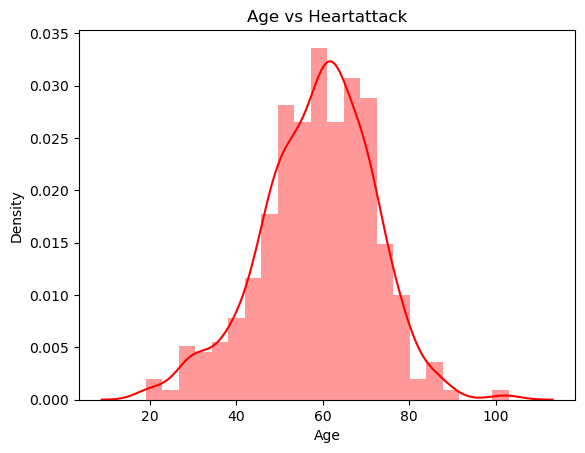

In [7]:
sns.distplot(hrt_df[hrt_df['Heart Attack']==1.0]['Age'],color = 'r',kde =True) #incase of  heartattack (output =1)
plt.title('Age vs Heartattack')
plt.show()

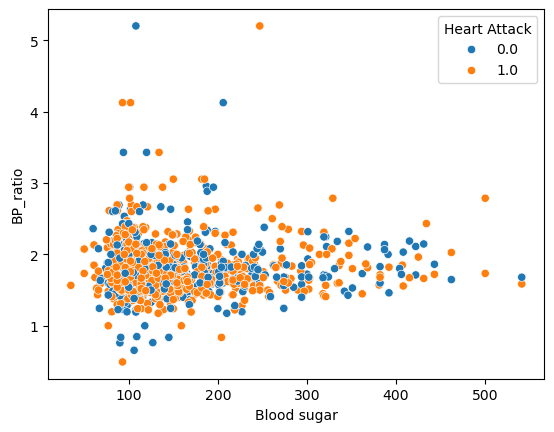

In [8]:
sns.scatterplot(x = 'Blood sugar', y = 'BP_ratio',data = hrt_df,hue = 'Heart Attack')
plt.show()

In [9]:
hrt_df.head()

,Age,Gender,Heart rate,Blood sugar,CK-MB,Troponin,Heart Attack,BP_ratio
0,63,1,66,160.0,1.80,0.012,0.0,1.927711
1,20,1,94,296.0,6.75,1.060,1.0,2.130435
2,56,1,64,270.0,1.99,0.003,0.0,2.077922
3,66,1,70,270.0,13.87,0.122,1.0,2.181818
4,54,1,64,300.0,1.08,0.003,0.0,1.723077


    CANCER

In [10]:
cnr_df = pd.read_csv('Cancer_data.csv')
cnr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1500 non-null   int64  
 1   Gender            1500 non-null   int64  
 2   BMI               1500 non-null   float64
 3   Smoking           1500 non-null   int64  
 4   GeneticRisk       1500 non-null   int64  
 5   PhysicalActivity  1500 non-null   float64
 6   AlcoholIntake     1500 non-null   float64
 7   CancerHistory     1500 non-null   int64  
 8   Diagnosis         1500 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 105.6 KB


In [11]:
cnr_df.BMI = cnr_df.BMI.round(2)
cnr_df.PhysicalActivity = cnr_df.PhysicalActivity.round(2)
cnr_df.AlcoholIntake = cnr_df.AlcoholIntake.round(2)

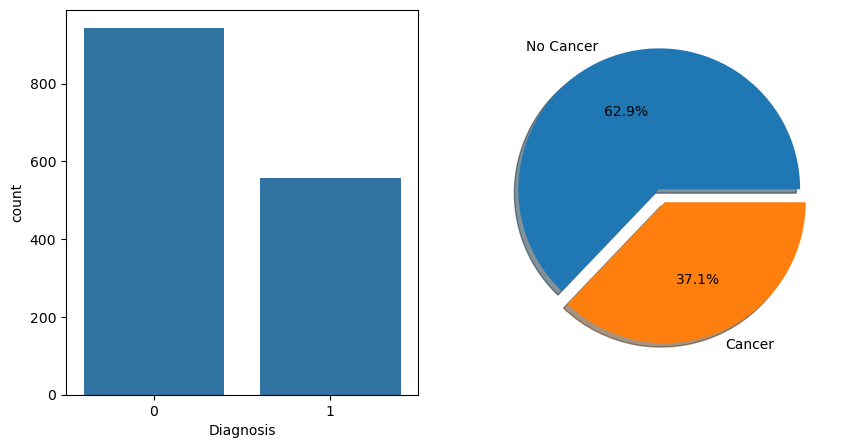

In [12]:
label = ['No Cancer' ,'Cancer']
fig,ax = plt.subplots(1,2, figsize = (10,5))
sns.countplot(x = 'Diagnosis',data = cnr_df,ax = ax[0])
plt.pie(cnr_df['Diagnosis'].value_counts(),autopct='%0.1f%%',shadow=True,explode = [0.1,0],labels = label)
plt.show()

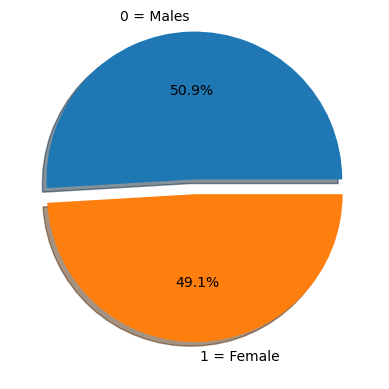

In [13]:
label = ['0 = Males' ,'1 = Female']
plt.pie(cnr_df['Gender'].value_counts(),autopct='%0.1f%%',shadow=True,explode = [0.1,0],labels = label)
plt.show()

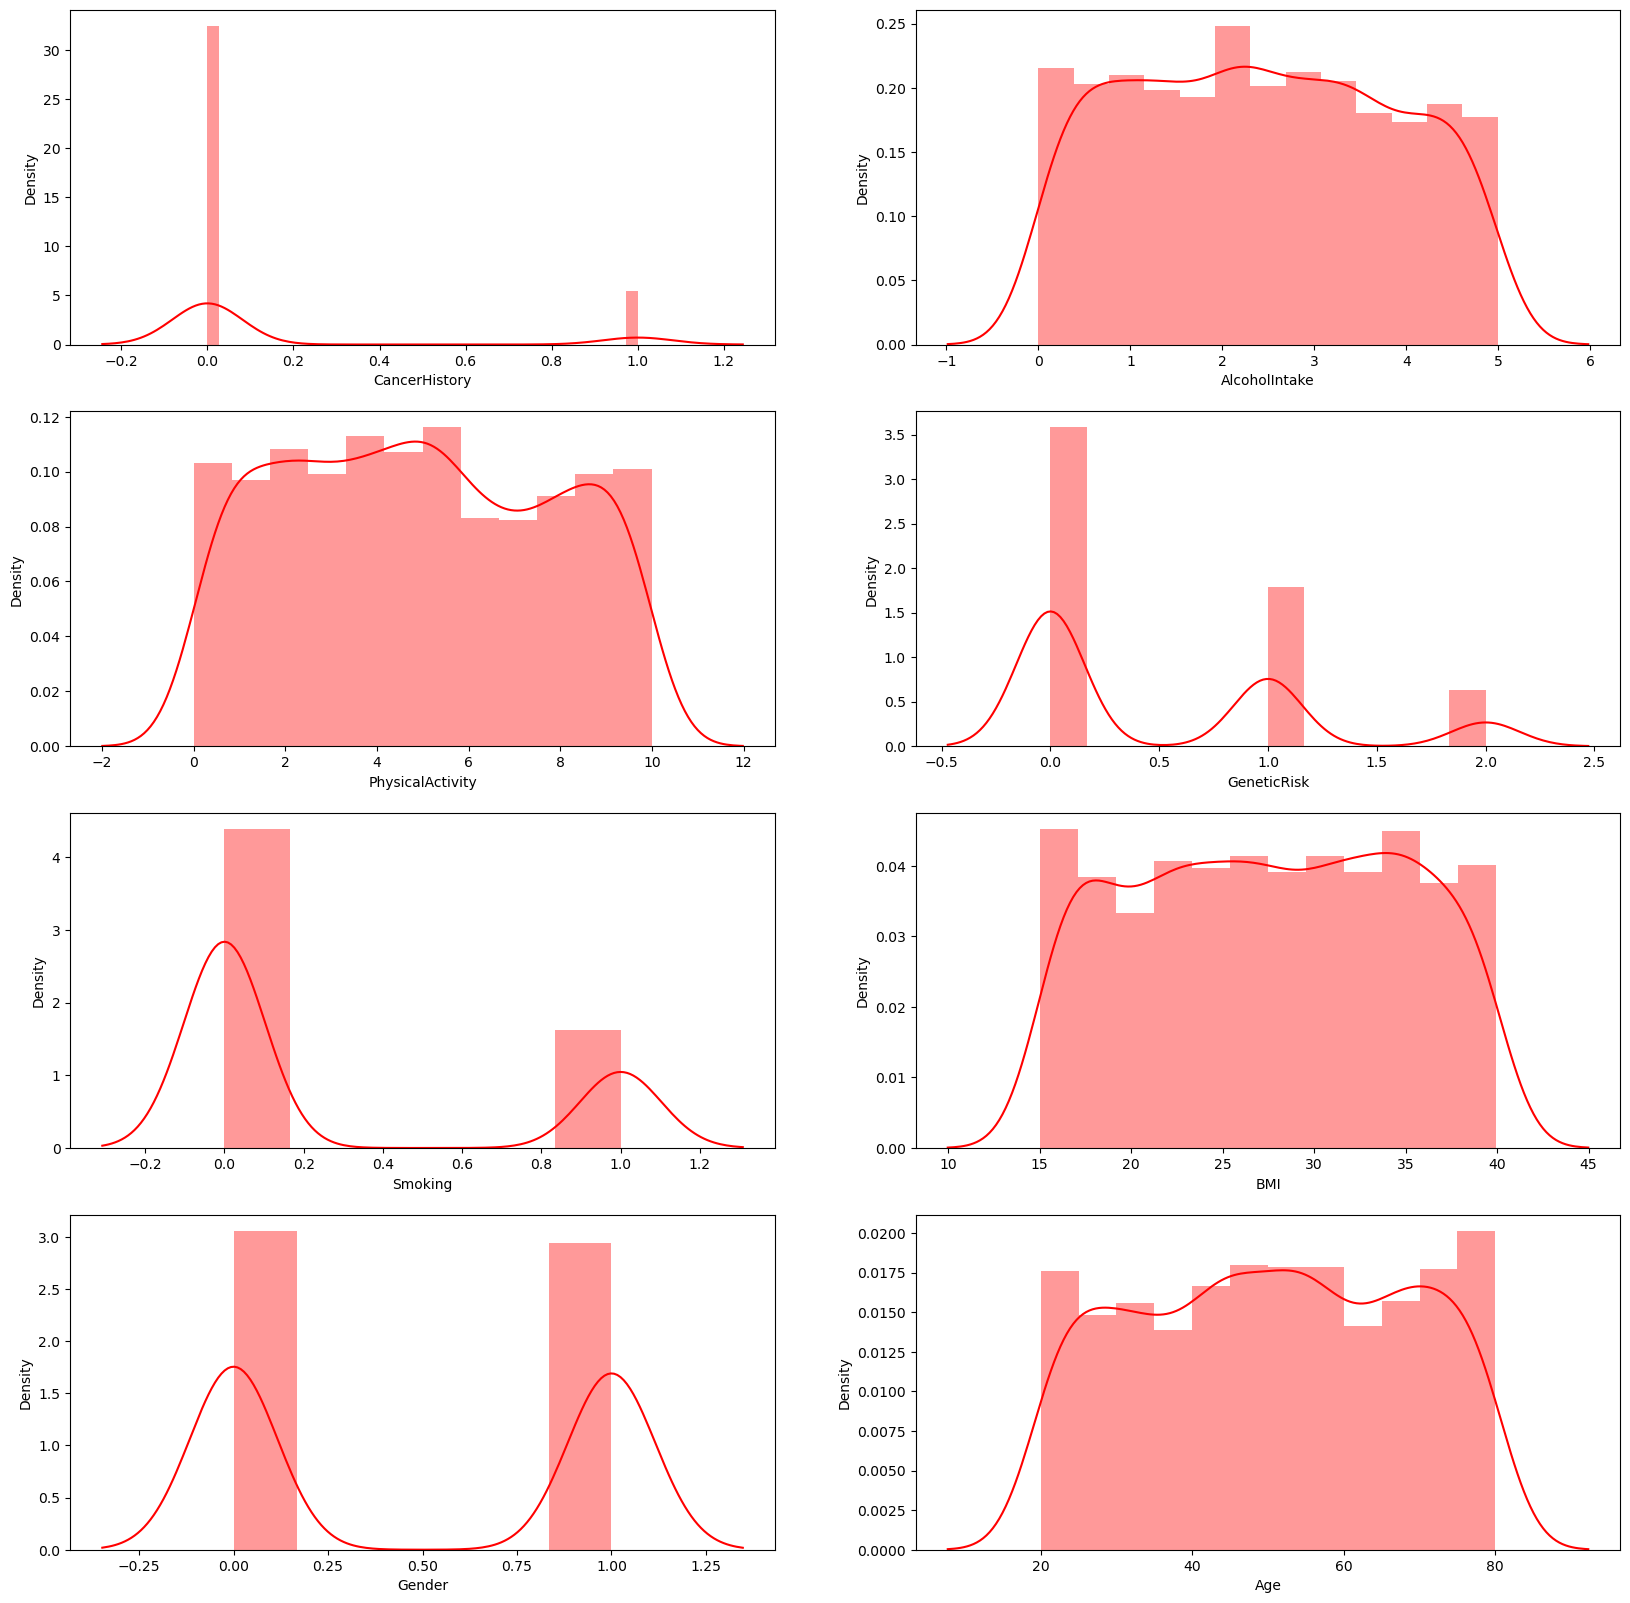

In [14]:
fig,ax = plt.subplots(4,2,figsize = (20,20))
sns.distplot(cnr_df['CancerHistory'],kde = True,color = 'r',ax = ax[0,0])
sns.distplot(cnr_df['AlcoholIntake'],kde = True,color = 'r',ax = ax[0,1])
sns.distplot(cnr_df['PhysicalActivity'],kde = True,color = 'r',ax = ax[1,0])
sns.distplot(cnr_df['GeneticRisk'],kde = True,color = 'r',ax = ax[1,1])
sns.distplot(cnr_df['Smoking'],kde = True,color = 'r',ax = ax[2,0])
sns.distplot(cnr_df['BMI'],kde = True,color = 'r',ax = ax[2,1])
sns.distplot(cnr_df['Gender'],kde = True,color = 'r',ax = ax[3,0])
sns.distplot(cnr_df['Age'],kde = True,color = 'r',ax = ax[3,1])
plt.show()

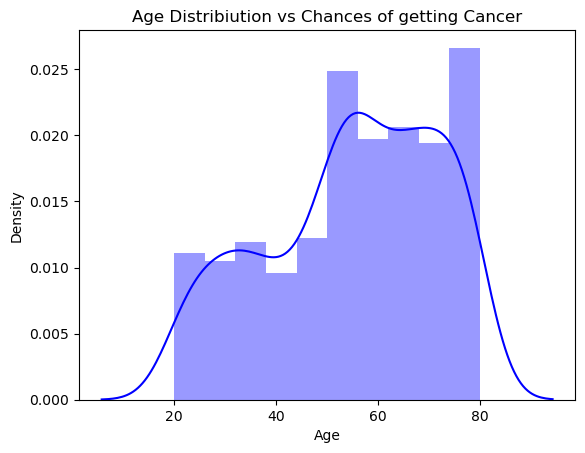

In [15]:
sns.distplot(cnr_df[cnr_df['Diagnosis'] == 1]['Age'],kde = True,color = 'b')
plt.title('Age Distribiution vs Chances of getting Cancer')
plt.show()

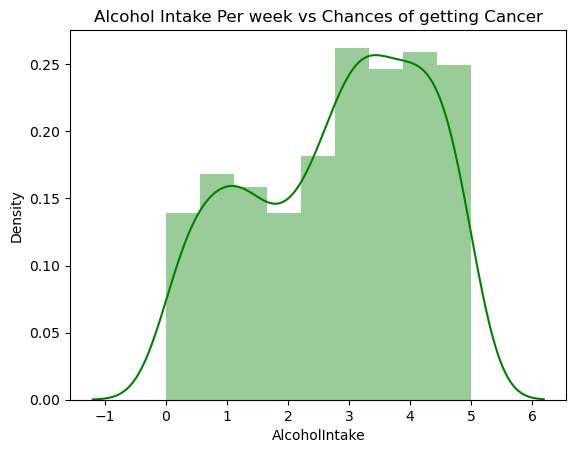

In [16]:
sns.distplot(cnr_df[cnr_df['Diagnosis'] == 1]['AlcoholIntake'],kde = True,color = 'g')
plt.title('Alcohol Intake Per week vs Chances of getting Cancer')
plt.show()

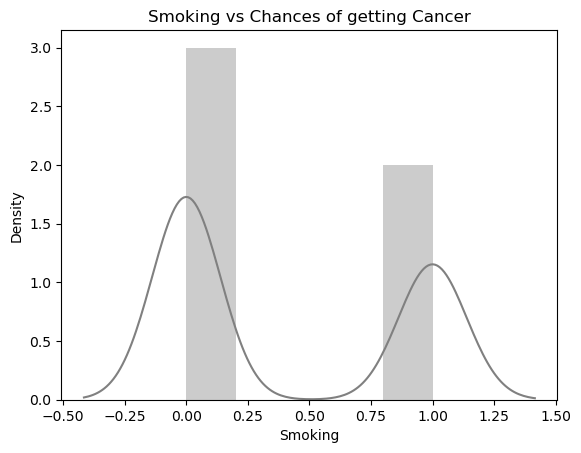

In [17]:
sns.distplot(cnr_df[cnr_df['Diagnosis'] == 1]['Smoking'],kde = True,color = 'grey')
plt.title('Smoking vs Chances of getting Cancer')
plt.show()

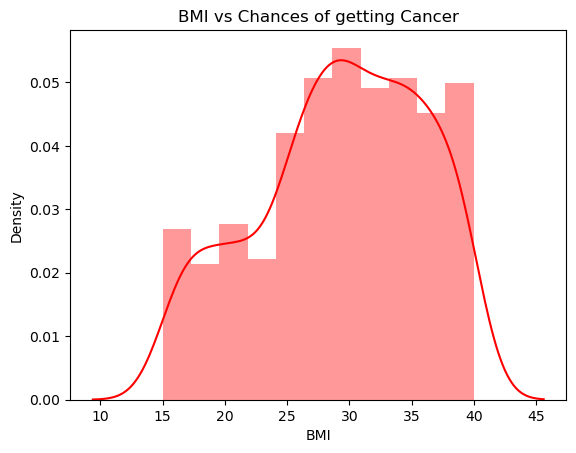

In [18]:
sns.distplot(cnr_df[cnr_df['Diagnosis'] == 1]['BMI'],kde = True,color = 'r')
plt.title('BMI vs Chances of getting Cancer')
plt.show()

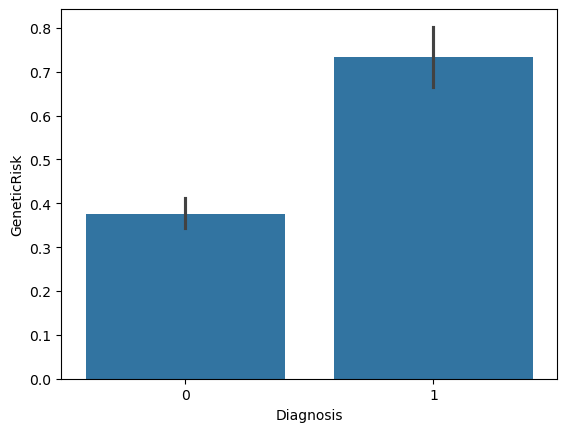

In [19]:
sns.barplot(x = 'Diagnosis', y ='GeneticRisk',data = cnr_df)
plt.show()

    DIABETES

In [20]:
dbt_df = pd.read_csv('diabetes.csv')
dbt_df = dbt_df.rename(columns = {'Outcome':'Diabetic'})
dbt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Diabetic                  768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


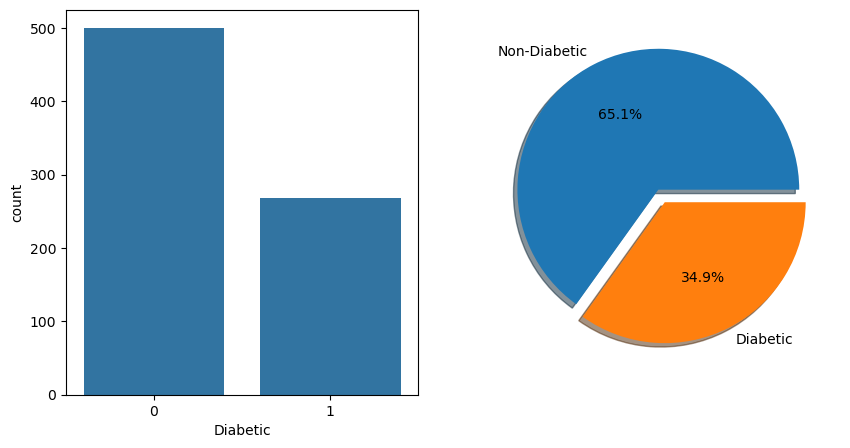

In [21]:
label = ['Non-Diabetic','Diabetic']
fig,ax = plt.subplots(1,2, figsize = (10,5))
sns.countplot(x = 'Diabetic',data = dbt_df,ax = ax[0])
plt.pie(dbt_df['Diabetic'].value_counts(),autopct='%0.1f%%',shadow=True,explode = [0.1,0],labels = label)
plt.show()

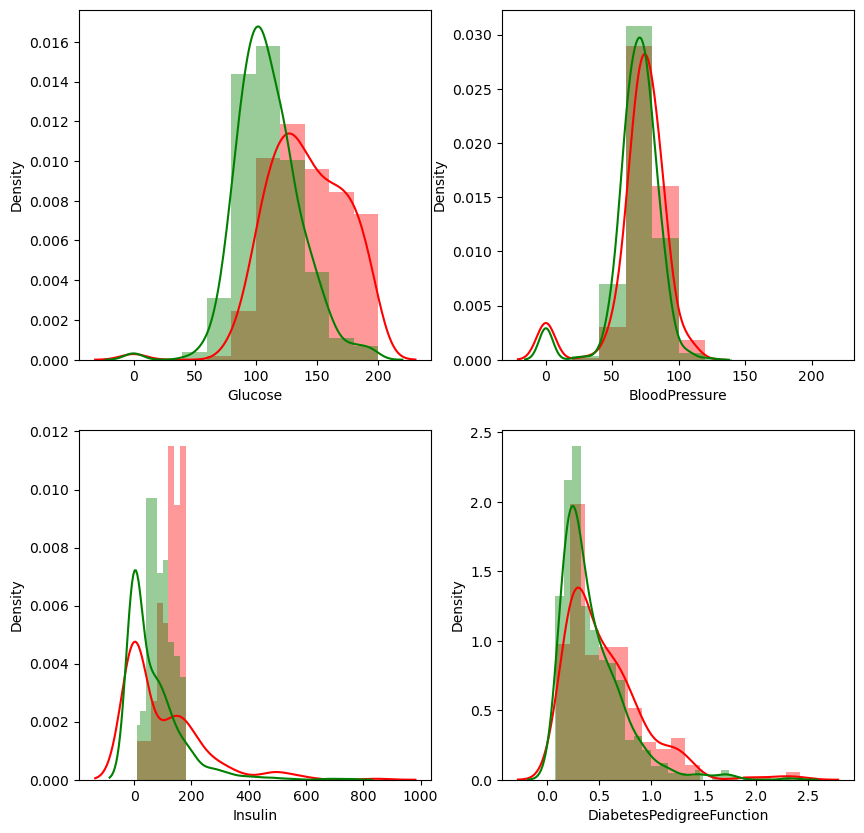

<Figure size 500x500 with 0 Axes>

In [22]:
fig,ax = plt.subplots(2,2, figsize = (10,10))
plt.figure(figsize=(5,5))
sns.distplot(dbt_df[dbt_df['Diabetic']==1]['Glucose'],kde = True,color = 'r',ax = ax[0,0],bins = [10,20,40,60,80,100,120,140,160,180,200,220])
sns.distplot(dbt_df[dbt_df['Diabetic']==0]['Glucose'],kde = True,color = 'g',ax = ax[0,0],bins = [10,20,40,60,80,100,120,140,160,180,200,220])
sns.distplot(dbt_df[dbt_df['Diabetic']==1]['BloodPressure'],kde = True,color = 'r',ax = ax[0,1],bins = [10,20,40,60,80,100,120,140,160,180,200,220])
sns.distplot(dbt_df[dbt_df['Diabetic']==0]['BloodPressure'],kde = True,color = 'g',ax = ax[0,1],bins = [10,20,40,60,80,100,120,140,160,180,200,220])
sns.distplot(dbt_df[dbt_df['Diabetic']==1]['Insulin'],kde = True,color = 'r',ax = ax[1,0],bins = [10,20,40,60,80,100,120,140,160,180])
sns.distplot(dbt_df[dbt_df['Diabetic']==0]['Insulin'],kde = True,color = 'g',ax = ax[1,0],bins = [10,20,40,60,80,100,120,140,160,180])
sns.distplot(dbt_df[dbt_df['Diabetic']==1]['DiabetesPedigreeFunction'],kde = True,color = 'r',ax = ax[1,1])
sns.distplot(dbt_df[dbt_df['Diabetic']==0]['DiabetesPedigreeFunction'],kde = True,color = 'g',ax = ax[1,1])
plt.show()

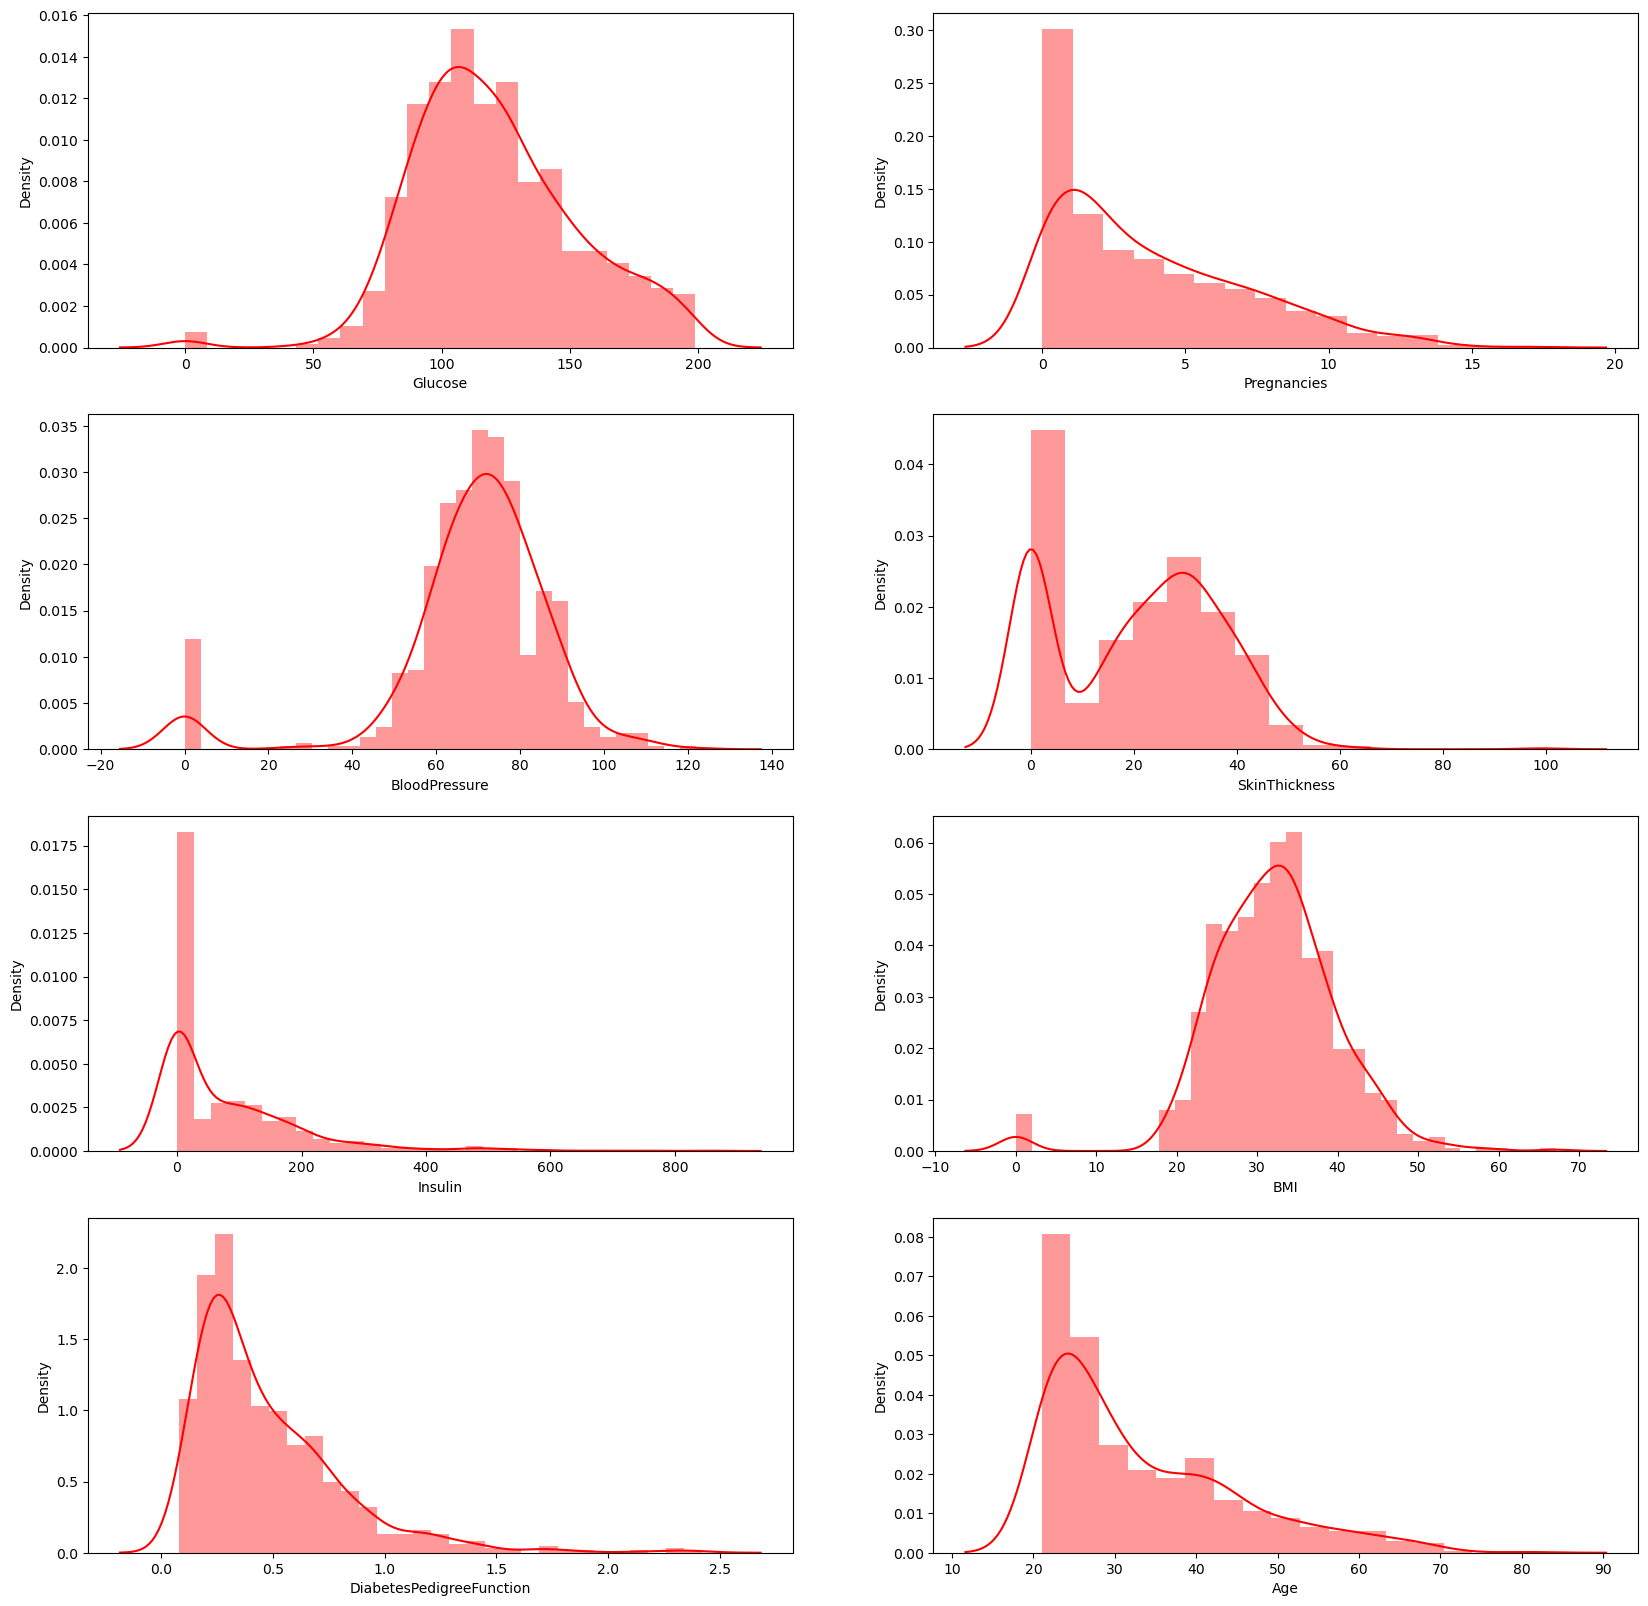

In [23]:
fig,ax = plt.subplots(4,2,figsize = (20,20))
sns.distplot(dbt_df['Glucose'],kde = True,color = 'r',ax = ax[0,0])
sns.distplot(dbt_df['Pregnancies'],kde = True,color = 'r',ax = ax[0,1])
sns.distplot(dbt_df['BloodPressure'],kde = True,color = 'r',ax = ax[1,0])
sns.distplot(dbt_df['SkinThickness'],kde = True,color = 'r',ax = ax[1,1])
sns.distplot(dbt_df['Insulin'],kde = True,color = 'r',ax = ax[2,0])
sns.distplot(dbt_df['BMI'],kde = True,color = 'r',ax = ax[2,1])
sns.distplot(dbt_df['DiabetesPedigreeFunction'],kde = True,color = 'r',ax = ax[3,0])
sns.distplot(dbt_df['Age'],kde = True,color = 'r',ax = ax[3,1])
plt.show()

    Validation Curve Function

In [24]:
def plot_validation_curve(model,X,y,param_name,param_range,cv=5,scoring='accuracy',title=''):
    train_scores, val_scores = validation_curve(model,X,y,param_name=param_name,param_range=param_range,cv=cv,scoring=scoring,n_jobs=-1)

    train_mean = np.mean(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)

    plt.figure(figsize=(8, 5))
    plt.plot(param_range, train_mean, label='Training Score', marker='o')
    plt.plot(param_range, val_mean, label='Validation Score', marker='o')
    plt.xlabel(param_name)
    plt.ylabel(scoring)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

In [25]:
X_hrt = hrt_df.drop(columns=['Heart Attack'])
y_hrt = hrt_df['Heart Attack']
X_hrt_train, X_hrt_test, y_hrt_train, y_hrt_test = train_test_split(X_hrt,y_hrt,test_size=0.2,random_state=0)

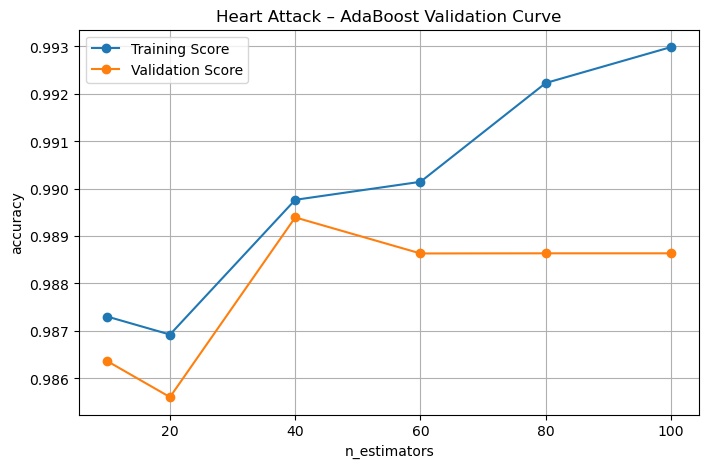

In [26]:
  plot_validation_curve(
      model=AdaBoostClassifier(random_state=0),
      X=X_hrt,
      y=y_hrt,
      param_name='n_estimators',
      param_range=[10, 20, 40, 60, 80, 100],
      title='Heart Attack – AdaBoost Validation Curve'
  )

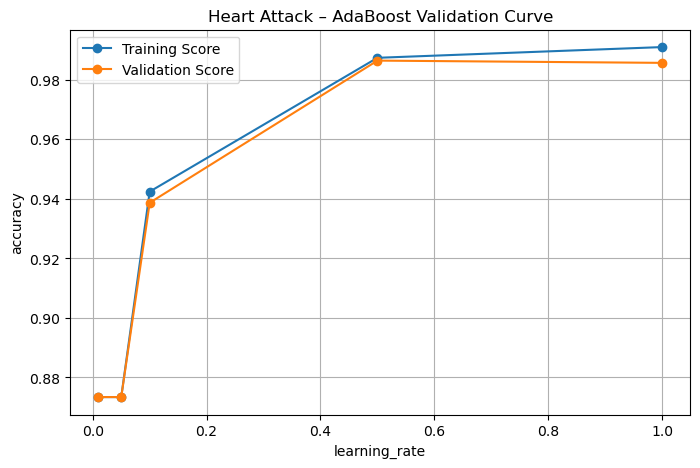

In [27]:
  plot_validation_curve(
      model=AdaBoostClassifier(random_state=0),
      X=X_hrt,
      y=y_hrt,
      param_name='learning_rate',
      param_range=[0.01, 0.05, 0.1, 0.5, 1],
      title='Heart Attack – AdaBoost Validation Curve'
  )

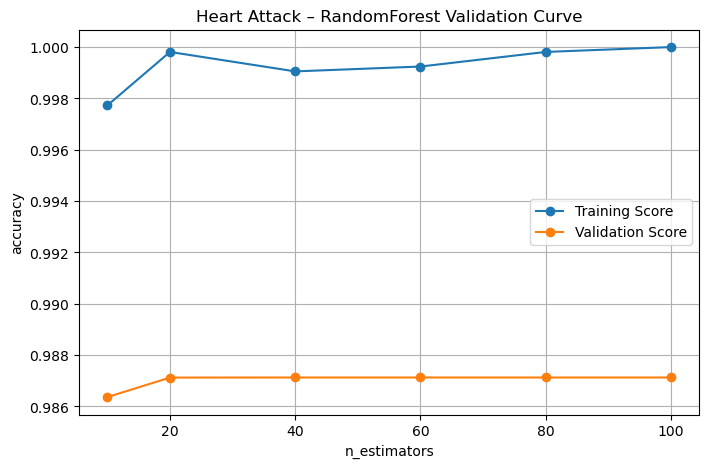

In [28]:
  plot_validation_curve(
      model=RandomForestClassifier(random_state=0),
      X=X_hrt,
      y=y_hrt,
      param_name='n_estimators',
      param_range=[10, 20, 40, 60, 80, 100],
      title='Heart Attack – RandomForest Validation Curve'
  )

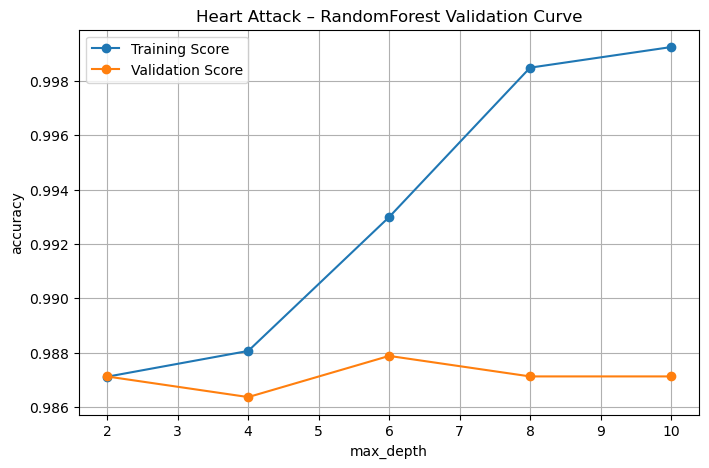

In [29]:
  plot_validation_curve(
      model=RandomForestClassifier(random_state=0),
      X=X_hrt,
      y=y_hrt,
      param_name='max_depth',
      param_range=[2,4,6,8,10],
      title='Heart Attack – RandomForest Validation Curve'
  )

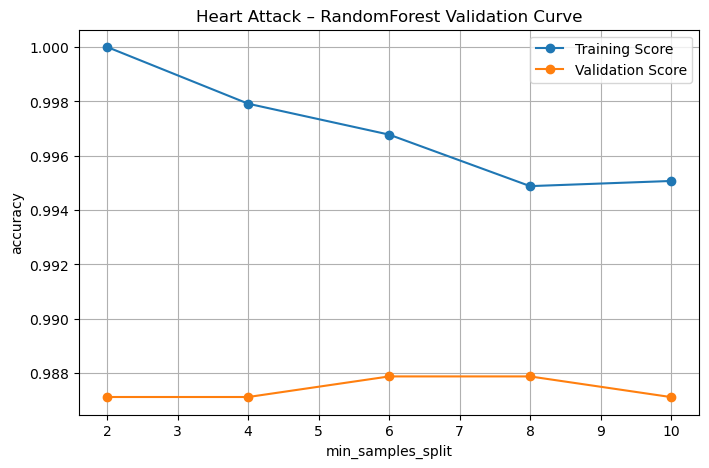

In [30]:
  plot_validation_curve(
      model=RandomForestClassifier(random_state=0),
      X=X_hrt,
      y=y_hrt,
      param_name='min_samples_split',
      param_range=[2,4,6,8,10],
      title='Heart Attack – RandomForest Validation Curve'
  )

In [31]:
X_cnr = cnr_df.drop(columns=['Diagnosis'])
y_cnr = cnr_df['Diagnosis']
X_cnr_train, X_cnr_test, y_cnr_train, y_cnr_test = train_test_split(X_cnr,y_cnr,test_size=0.2,random_state=0)


In [32]:
sc = StandardScaler()
X_cnr_train = sc.fit_transform(X_cnr_train)
X_cnr_test = sc.transform(X_cnr_test)

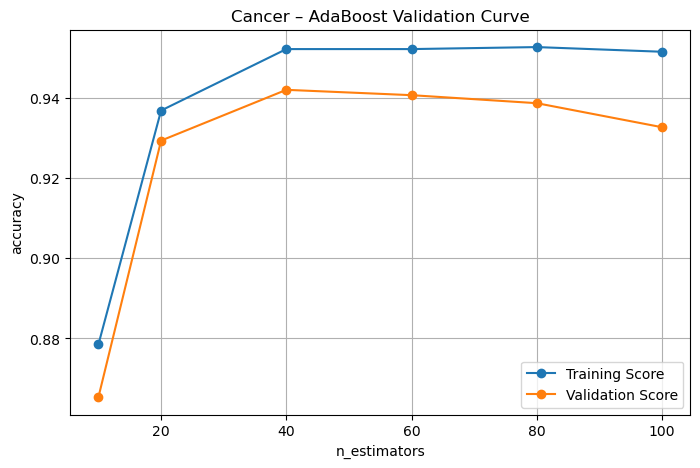

In [33]:
  plot_validation_curve(
      model=AdaBoostClassifier(random_state=0),
      X=X_cnr,
      y=y_cnr,
      param_name='n_estimators',
      param_range=[10, 20, 40, 60, 80, 100],
      title='Cancer – AdaBoost Validation Curve'
  )

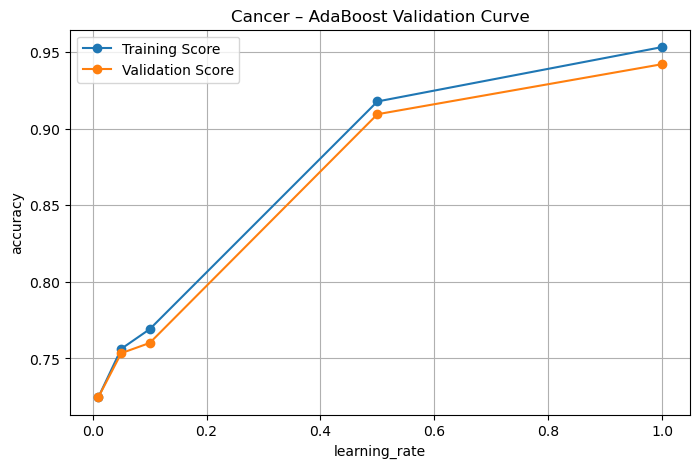

In [34]:
  plot_validation_curve(
      model=AdaBoostClassifier(random_state=0),
      X=X_cnr,
      y=y_cnr,
      param_name='learning_rate',
      param_range=[0.01, 0.05, 0.1, 0.5, 1],
      title='Cancer – AdaBoost Validation Curve'
  )

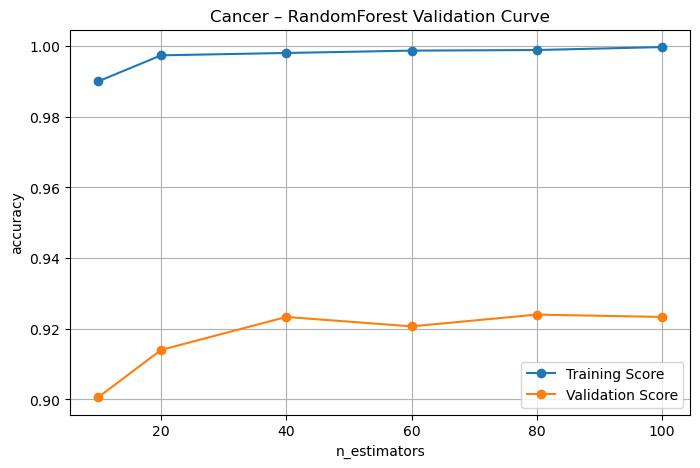

In [35]:
  plot_validation_curve(
      model=RandomForestClassifier(random_state=0),
      X=X_cnr,
      y=y_cnr,
      param_name='n_estimators',
      param_range=[10, 20, 40, 60, 80, 100],
      title='Cancer – RandomForest Validation Curve'
  )

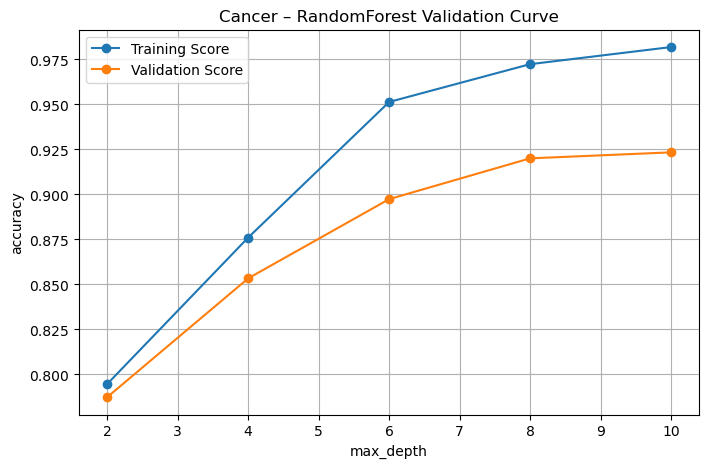

In [36]:
  plot_validation_curve(
      model=RandomForestClassifier(random_state=0),
      X=X_cnr,
      y=y_cnr,
      param_name='max_depth',
      param_range=[2,4,6,8,10],
      title='Cancer – RandomForest Validation Curve'
  )

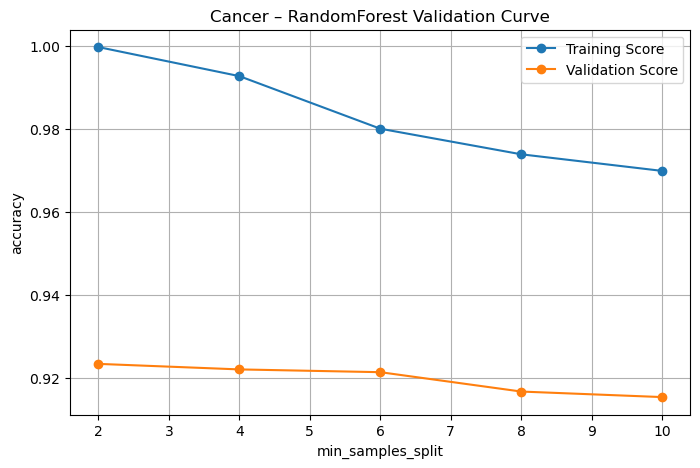

In [37]:
  plot_validation_curve(
      model=RandomForestClassifier(random_state=0),
      X=X_cnr,
      y=y_cnr,
      param_name='min_samples_split',
      param_range=[2,4,6,8,10],
      title='Cancer – RandomForest Validation Curve'
  )

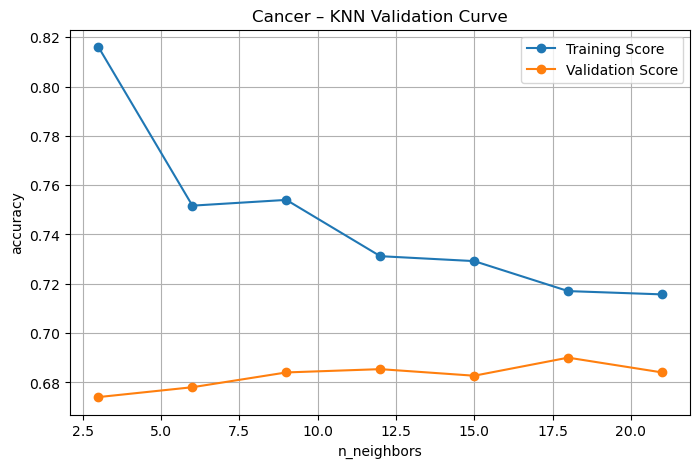

In [38]:
  plot_validation_curve(
      model=KNeighborsClassifier(),
      X=X_cnr,
      y=y_cnr,
      param_name='n_neighbors',
      param_range=[3,6,9,12,15,18,21],
      title='Cancer – KNN Validation Curve'
  )

In [39]:
X_dbt = dbt_df.drop(columns=['Diabetic'])
y_dbt = dbt_df['Diabetic']
X_train, X_test, y_train, y_test = train_test_split(X_dbt, y_dbt, test_size=0.2, random_state=0)


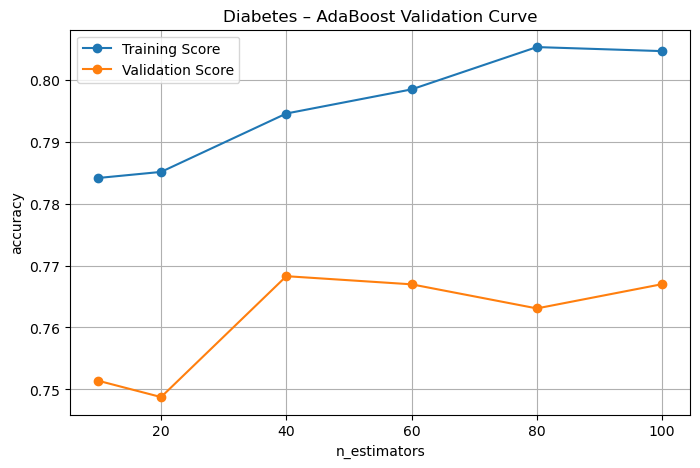

In [40]:
  plot_validation_curve(
      model=AdaBoostClassifier(random_state=0),
      X=X_dbt,
      y=y_dbt,
      param_name='n_estimators',
      param_range=[10, 20, 40, 60, 80, 100],
      title='Diabetes – AdaBoost Validation Curve'
  )

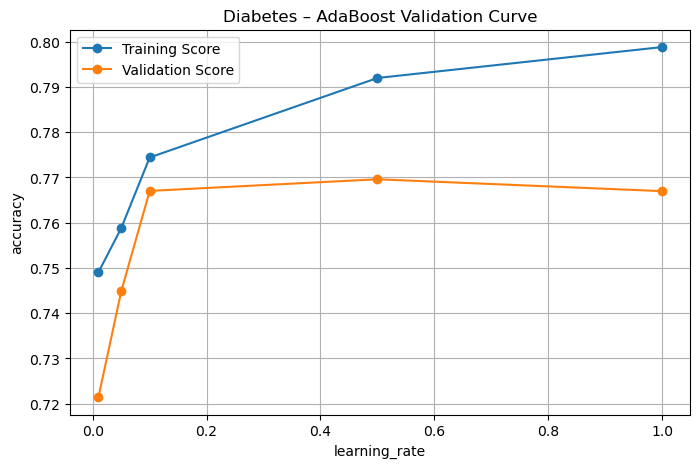

In [41]:
  plot_validation_curve(
      model=AdaBoostClassifier(random_state=0),
      X=X_dbt,
      y=y_dbt,
      param_name='learning_rate',
      param_range=[0.01, 0.05, 0.1, 0.5, 1],
      title='Diabetes – AdaBoost Validation Curve'
  )

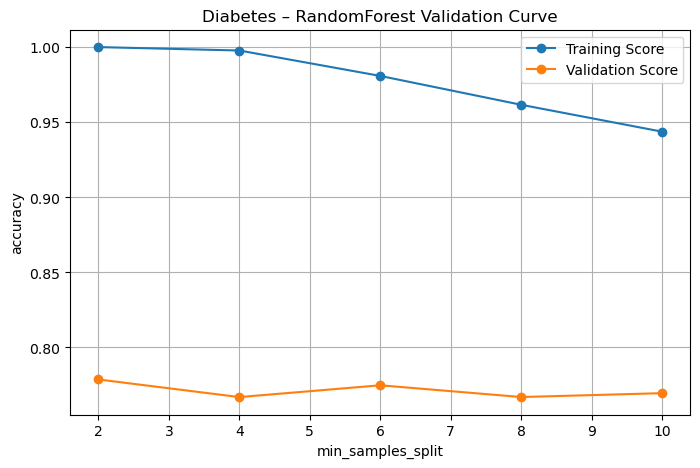

In [42]:
  plot_validation_curve(
      model=RandomForestClassifier(random_state=0),
      X=X_dbt,
      y=y_dbt,
      param_name='min_samples_split',
      param_range=[2,4,6,8,10],
      title='Diabetes – RandomForest Validation Curve'
  )

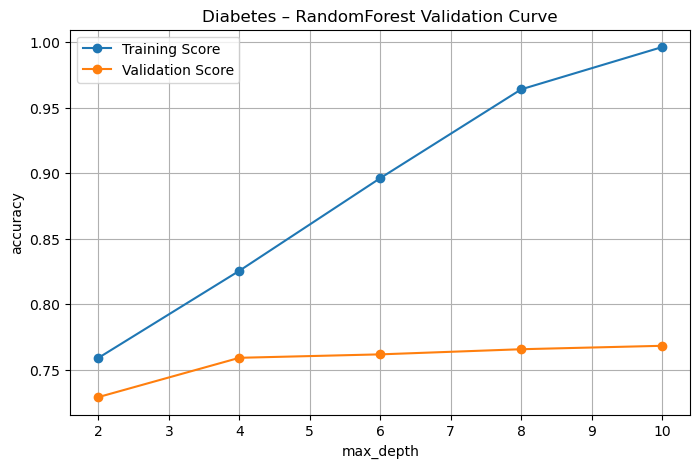

In [43]:
  plot_validation_curve(
      model=RandomForestClassifier(random_state=0),
      X=X_dbt,
      y=y_dbt,
      param_name='max_depth',
      param_range=[2,4,6,8,10],
      title='Diabetes – RandomForest Validation Curve'
  )

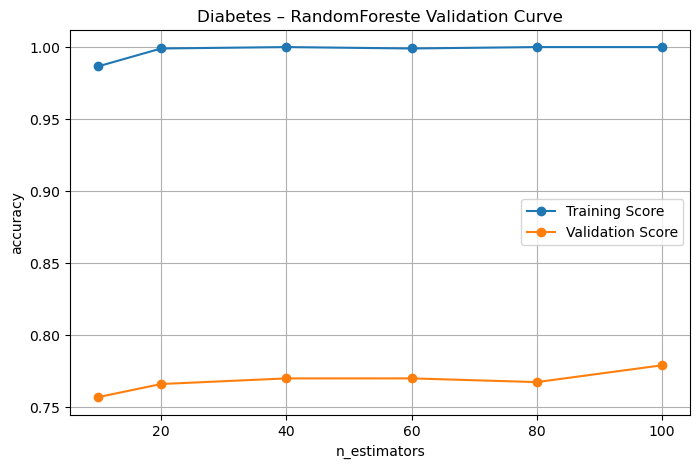

In [44]:
  plot_validation_curve(
      model=RandomForestClassifier(random_state=0),
      X=X_dbt,
      y=y_dbt,
      param_name='n_estimators',
      param_range=[10, 20, 40, 60, 80, 100],
      title='Diabetes – RandomForeste Validation Curve'
  )

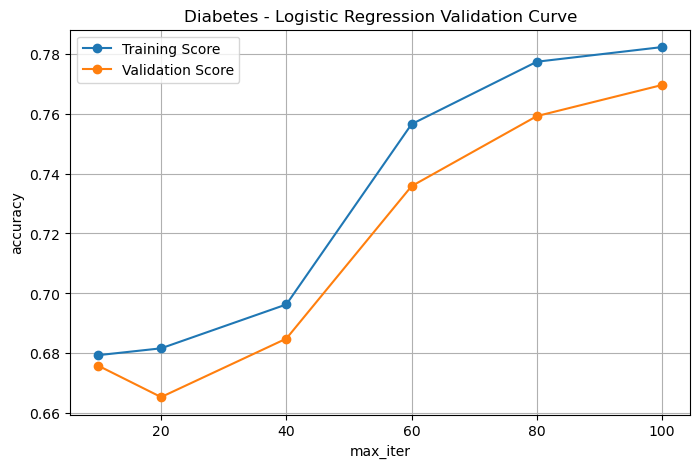

In [45]:
  plot_validation_curve(
      model=LogisticRegression(),
      X=X_dbt,
      y=y_dbt,
      param_name='max_iter',
      param_range=[10, 20, 40, 60, 80, 100],
      title='Diabetes - Logistic Regression Validation Curve'
  )

In [46]:
heart_abc = AdaBoostClassifier(n_estimators=40,learning_rate=0.5,random_state=0)
heart_rfc = RandomForestClassifier(n_estimators=20,max_depth=6,min_samples_split=7,random_state=0)
heart_svm = SVC(kernel='linear', random_state=0)
heart_abc.fit(X_hrt_train, y_hrt_train)
heart_rfc.fit(X_hrt_train, y_hrt_train)
heart_svm.fit(X_hrt_train, y_hrt_train)
heart_abc_pred = heart_abc.predict(X_hrt_test)
heart_rfc_pred = heart_rfc.predict(X_hrt_test)
heart_svm_pred = heart_svm.predict(X_hrt_test)
heart_abc_acc = accuracy_score(y_hrt_test, heart_abc_pred)
heart_rfc_acc = accuracy_score(y_hrt_test, heart_rfc_pred)
heart_svm_acc = accuracy_score(y_hrt_test, heart_svm_pred)
print(f'Adaboost Accuracy {heart_abc_acc * 100}')
print(f'Random Forest Accuracy {heart_rfc_acc * 100}')
print(f'SVM Accuracy {heart_svm_acc * 100}')
heart_ensem_clf = VotingClassifier(estimators=[('rf', heart_rfc),('ab', heart_abc),('svm', heart_svm)],voting='hard')
heart_ensem_clf.fit(X_hrt_train, y_hrt_train)
heart_ensem_clf_pred = heart_ensem_clf.predict(X_hrt_test)
heart_ensem_clf_acc = accuracy_score(y_hrt_test, heart_ensem_clf_pred)
print(f"The Ensemble Accuracy is {heart_ensem_clf_acc * 100}")

Adaboost Accuracy 99.24242424242425
Random Forest Accuracy 99.24242424242425
SVM Accuracy 79.92424242424242
The Ensemble Accuracy is 99.24242424242425


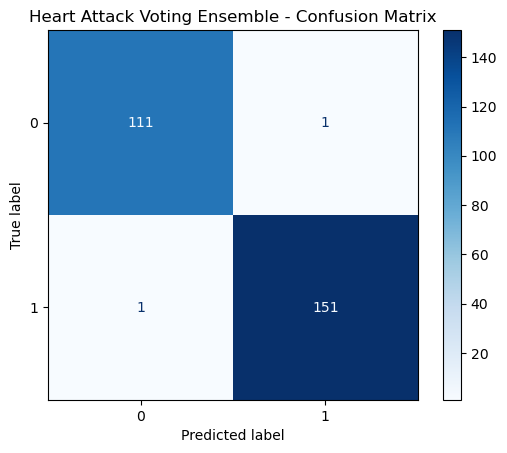

Ensemble Precision : 0.9934
Ensemble Recall    : 0.9934
Ensemble F1 Score  : 0.9934


In [47]:
cm = confusion_matrix(y_hrt_test, heart_ensem_clf_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Heart Attack Voting Ensemble - Confusion Matrix")
plt.show()

# Precision, Recall, F1Score
ensemble_precision = precision_score(y_hrt_test, heart_ensem_clf_pred)
ensemble_recall = recall_score(y_hrt_test, heart_ensem_clf_pred)
ensemble_f1 = f1_score(y_hrt_test, heart_ensem_clf_pred)

print(f"Ensemble Precision : {ensemble_precision:.4f}")
print(f"Ensemble Recall    : {ensemble_recall:.4f}")
print(f"Ensemble F1 Score  : {ensemble_f1:.4f}")

In [48]:
  # joblib.dump(heart_ensem_clf, 'heart_attack_model.joblib')

In [49]:
cancer_rfc = RandomForestClassifier( n_estimators=40,max_depth=6,min_samples_split=6,random_state=0)
cancer_abc = AdaBoostClassifier(n_estimators=40,learning_rate=1,random_state=0)
cancer_knn = KNeighborsClassifier(n_neighbors=18)
cancer_rfc.fit(X_cnr_train, y_cnr_train)
cancer_abc.fit(X_cnr_train, y_cnr_train)
cancer_knn.fit(X_cnr_train, y_cnr_train)
cancer_rfc_pred = cancer_rfc.predict(X_cnr_test)
cancer_abc_pred = cancer_abc.predict(X_cnr_test)
cancer_knn_pred = cancer_knn.predict(X_cnr_test)
cancer_rfc_acc = accuracy_score(y_cnr_test, cancer_rfc_pred)
cancer_abc_acc = accuracy_score(y_cnr_test, cancer_abc_pred)
cancer_knn_acc = accuracy_score(y_cnr_test, cancer_knn_pred)
print(f'RandomForest Classifier Accuracy {cancer_rfc_acc * 100}')
print(f'AdaBoost Classifier Accuracy {cancer_abc_acc * 100}')
print(f'KNN Classifier Accuracy {cancer_knn_acc * 100}')
cancer_ensem_clf = VotingClassifier(estimators=[('RF', cancer_rfc),('ABC', cancer_abc),('KNN', cancer_knn)],voting='hard')
cancer_ensem_clf.fit(X_cnr_train, y_cnr_train)
cancer_ensem_clf_pred = cancer_ensem_clf.predict(X_cnr_test)
cancer_ensem_clf_acc = accuracy_score(y_cnr_test, cancer_ensem_clf_pred)
print(f"The Ensemble Accuracy is {cancer_ensem_clf_acc * 100}")

RandomForest Classifier Accuracy 88.0
AdaBoost Classifier Accuracy 96.66666666666667
KNN Classifier Accuracy 89.0
The Ensemble Accuracy is 94.33333333333334


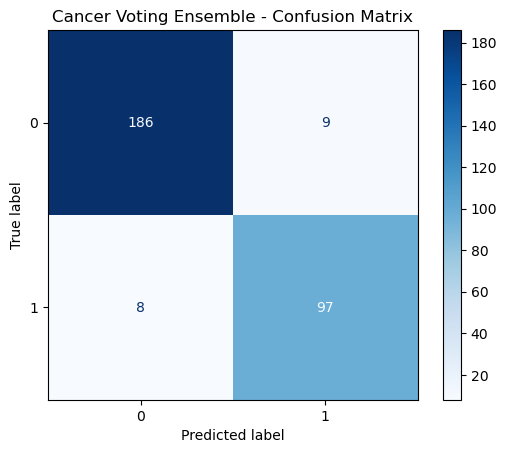

Cancer Ensemble Precision : 0.9151
Cancer Ensemble Recall    : 0.9238
Cancer Ensemble F1 Score  : 0.9194


In [50]:
cm = confusion_matrix(y_cnr_test, cancer_ensem_clf_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Cancer Voting Ensemble - Confusion Matrix")
plt.show()

# Precision, Recall, F1 Score
cancer_ensemble_precision = precision_score(y_cnr_test, cancer_ensem_clf_pred)
cancer_ensemble_recall = recall_score(y_cnr_test, cancer_ensem_clf_pred)
cancer_ensemble_f1 = f1_score(y_cnr_test, cancer_ensem_clf_pred)

print(f"Cancer Ensemble Precision : {cancer_ensemble_precision:.4f}")
print(f"Cancer Ensemble Recall    : {cancer_ensemble_recall:.4f}")
print(f"Cancer Ensemble F1 Score  : {cancer_ensemble_f1:.4f}")

In [51]:
  # joblib.dump(cancer_ensem_clf, 'cancer_model.joblib')

  # joblib.dump(sc, 'cancer_scaler.joblib')

In [52]:
diabetes_rdf = RandomForestClassifier(n_estimators=60,max_depth=4,min_samples_split=8)
diabetes_log_reg = LogisticRegression(max_iter=100)
diabetes_abc = AdaBoostClassifier(n_estimators=40,learning_rate=0.5,random_state=0)
diabetes_rdf.fit(X_train, y_train)
diabetes_log_reg.fit(X_train, y_train)
diabetes_abc.fit(X_train, y_train)
diabetes_rdf_pred = diabetes_rdf.predict(X_test)
diabetes_log_reg_pred = diabetes_log_reg.predict(X_test)
diabetes_abc_pred = diabetes_abc.predict(X_test)
diabetes_rdf_acc = accuracy_score(y_test, diabetes_rdf_pred)
diabetes_log_reg_acc = accuracy_score(y_test, diabetes_log_reg_pred)
diabetes_abc_acc = accuracy_score(y_test, diabetes_abc_pred)
print(f'RandomForestClassifier Accuracy {diabetes_rdf_acc * 100}')
print(f'Logistic Regression Accuracy {diabetes_log_reg_acc * 100}')
print(f'AdaBoost Accuracy {diabetes_abc_acc * 100}')
diabetes_ensem_clf = VotingClassifier(estimators=[('RF', diabetes_rdf),('LGR', diabetes_log_reg),('ADB', diabetes_abc)],voting='hard')
diabetes_ensem_clf.fit(X_train, y_train)
diabetes_ensem_clf_pred = diabetes_ensem_clf.predict(X_test)
diabetes_ensem_clf_acc = accuracy_score(y_test, diabetes_ensem_clf_pred)
print(f"The Ensemble Accuracy is {diabetes_ensem_clf_acc * 100}")

RandomForestClassifier Accuracy 79.87012987012987
Logistic Regression Accuracy 82.46753246753246
AdaBoost Accuracy 79.22077922077922
The Ensemble Accuracy is 81.81818181818183


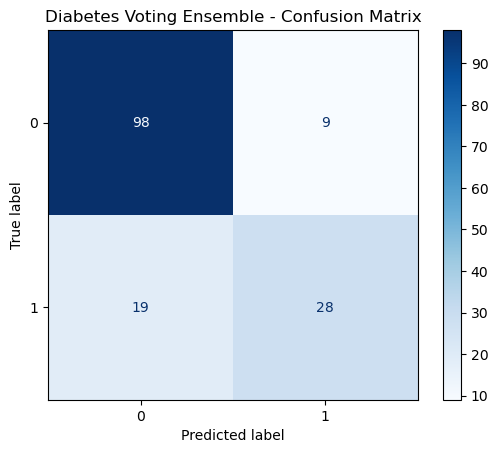

Diabetes Ensemble Precision : 0.7568
Diabetes Ensemble Recall    : 0.5957
Diabetes Ensemble F1 Score  : 0.6667


In [53]:
cm = confusion_matrix(y_test, diabetes_ensem_clf_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Diabetes Voting Ensemble - Confusion Matrix")
plt.show()

# Precision, Recall, F1 Score
diabetes_ensemble_precision = precision_score(y_test, diabetes_ensem_clf_pred)
diabetes_ensemble_recall = recall_score(y_test, diabetes_ensem_clf_pred)
diabetes_ensemble_f1 = f1_score(y_test, diabetes_ensem_clf_pred)

print(f"Diabetes Ensemble Precision : {diabetes_ensemble_precision:.4f}")
print(f"Diabetes Ensemble Recall    : {diabetes_ensemble_recall:.4f}")
print(f"Diabetes Ensemble F1 Score  : {diabetes_ensemble_f1:.4f}")

In [54]:
  # joblib.dump(diabetes_ensem_clf, 'diabetes_model.joblib')